# DATA SCIENCE AUGUST MAJOR PROJECT

# AIM
    To predict sentiment (either 1 or 0) based on Amazon Alexa reviews by finding best accuracy classification model for given data.
    
# FEATURES GIVEN :
    1. Rating           : Product rating
    2. Date             : Date on which the product was rated
    3. Variation        : Variation of the product
    4. Verfified_reviews: The verified reviews for the alexa
    5. Feedback         : 1(Positive) or 0 (Negative)

# PROJECT OUTCOMES : 
    
    This project gives scope to predict how much percent of consumers are statisfied in purchasing of amazon alexa and how products are reaching consumers expectation.
    
# APPLIED MODELS :

    a) Multinomial Naive Bayes Classification
    b) Logistic Regression
    c) KNN Classification
    

# 1) READING THE DATA SET

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv('C:\\Users\\posah\\Desktop\\amazon_alexa_data.csv')

# DATA ANALYSIS 

In [3]:
data

,Unnamed: 0,rating,date,variation,verified_reviews,feedback
0,0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...,...
3145,3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [4]:
data.describe()

,Unnamed: 0,rating,feedback
count,3150.000,3150.000000,3150.000000
mean,1574.500,4.463175,0.918413
std,909.471,1.068506,0.273778
min,0.000,1.000000,0.000000
25%,787.250,4.000000,1.000000
50%,1574.500,5.000000,1.000000
75%,2361.750,5.000000,1.000000
max,3149.000,5.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        3150 non-null   int64 
 1   rating            3150 non-null   int64 
 2   date              3150 non-null   object
 3   variation         3150 non-null   object
 4   verified_reviews  3150 non-null   object
 5   feedback          3150 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 147.8+ KB


In [6]:
data.shape

(3150, 6)

# 2) CHECKING FOR NULL VALUES

In [7]:
data.isnull().sum()

Unnamed: 0          0
rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.columns

Index(['Unnamed: 0', 'rating', 'date', 'variation', 'verified_reviews',
       'feedback'],
      dtype='object')

# Data Visualization

Rating vs Feedback

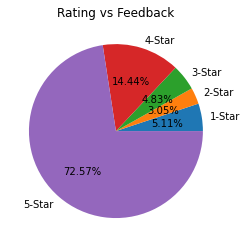

In [10]:
import operator as op
rat = [op.countOf(data.rating,1),op.countOf(data.rating,2),op.countOf(data.rating,3),
       op.countOf(data.rating,4),op.countOf(data.rating,5)]
plt.pie(rat,labels = ['1-Star','2-Star','3-Star','4-Star','5-Star'],autopct='%.2f%%')
plt.title('Rating vs Feedback')
plt.show()

In [11]:
data['verified_reviews'][:5]

0                                        Love my Echo!
1                                            Loved it!
2    Sometimes while playing a game, you can answer...
3    I have had a lot of fun with this thing. My 4 ...
4                                                Music
Name: verified_reviews, dtype: object

# 3) PREPROCESSING THE GIVEN DATA

In [12]:
import re
import nltk

In [13]:
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [14]:
lm = WordNetLemmatizer()
sw = stopwords.words('English')
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [15]:
review = []
for i in data['verified_reviews']:
    p = i.lower()                       # CONVERTING WORDS TO LOWER CASE
    p = re.sub('[^A-Za-z0-9]',' ',p)       # REMOVING PUNCTUATION
    p = word_tokenize(p)                # TOKENIZING THE WORDS
    p = [i for i in p if i not in sw]   # REMOVING THE STOP WORDS
    p = [lm.lemmatize(i) for i in p]    # LEMMATIZATION or STEMMING THE WORDS
    p = " ".join(p)
    review.append(p)                    # APPENDING INTO ARRAY
print(review)

['love echo', 'loved', 'sometimes playing game answer question correctly alexa say got wrong answer like able turn light away home', 'lot fun thing 4 yr old learns dinosaur control light play game like category nice sound playing music well', 'music', 'received echo gift needed another bluetooth something play music easily accessible found smart speaker wait see else', 'without cellphone use many feature ipad see use great alarm u r almost deaf hear alarm bedroom living room reason enough keep fun ask random question hear response seem smartbon politics yet', 'think 5th one purchased working getting one every room house really like feature offer specifily playing music echo controlling light throughout house', 'look great', 'love listened song heard since childhood get news weather information great', 'sent 85 year old dad talk constantly', 'love learning knew thing eveyday still figuring everything work far easy use understand make laugh time', 'purchased mother knee problem give some

# 4) Transforming the words into vectors using Count Vectorizer

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
cv = CountVectorizer()
sm = cv.fit_transform(review).toarray()
unique_words = cv.get_feature_names_out()
print(len(unique_words))

3548


# X & Y ARRAY

In [18]:
x = sm
y = data.iloc[:,-1]
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(3150, 3548)
(3150,)
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


# 5) SPLITING DATA INTO TRAINING AND TESTING

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2362, 3548)
(788, 3548)
(2362,)
(788,)


In [20]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [21]:
y

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64

# 6a) CREATING AND TRAINING MULTINOMIAL NAIVE BAYES CLASSIFICATION MODEL

In [22]:
from sklearn.naive_bayes import MultinomialNB

In [23]:
mnb = MultinomialNB()
mnb.fit(x_train,y_train)

MultinomialNB()

In [24]:
print('Training Score : ',mnb.score(x_train,y_train))
print('Testing Score  : ',mnb.score(x_test,y_test))

Training Score :  0.9585097375105842
Testing Score  :  0.9213197969543148


In [25]:
mnb_pred = mnb.predict(x_test)        # PREDICTING VALUES FOR TEST DATASET
mnb_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [26]:
from sklearn.metrics import confusion_matrix,classification_report

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [28]:
mnb_acc = accuracy_score(y_test,mnb_pred)
print('Accuracy by MNB : ',mnb_acc)

Accuracy by MNB :  0.9213197969543148


In [29]:
mnb_pr = precision_score(y_test,mnb_pred,average='macro')
print('Precision by MNB : ',mnb_pr)

Precision by MNB :  0.8163722197887769


In [30]:
mnb_rec = recall_score(y_test,mnb_pred,average='macro')
print('Recall by MNB : ',mnb_rec)

Recall by MNB :  0.6245425807069642


In [31]:
mnb_f1 = f1_score(y_test,mnb_pred,average='macro')
print('F1-score by MNB : ',mnb_f1)

F1-score by MNB :  0.6689972899728998


In [32]:
mnb_cm = confusion_matrix(y_test,mnb_pred)
print(mnb_cm)
print(classification_report(y_test,mnb_pred))

[[ 19  54]
 [  8 707]]
              precision    recall  f1-score   support

           0       0.70      0.26      0.38        73
           1       0.93      0.99      0.96       715

    accuracy                           0.92       788
   macro avg       0.82      0.62      0.67       788
weighted avg       0.91      0.92      0.90       788



# 6b) CREATING AND TRAINING LOGISTIC REGRESSION MODEL

In [33]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [34]:
lr.fit(x_train,y_train)

LogisticRegression()

In [35]:
print('Training Score : ',lr.score(x_train,y_train))
print('Testing Score  : ',lr.score(x_test,y_test))

Training Score :  0.9750211685012701
Testing Score  :  0.9289340101522843


In [36]:
lr_pred = lr.predict(x_test)       # PREDICTING VALUES FOR TEST DATASET
lr_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [37]:
lr_acc = accuracy_score(y_test,lr_pred)
print('Accuracy by LR : ',lr_acc)

Accuracy by LR :  0.9289340101522843


In [38]:
lr_pr = precision_score(y_test,lr_pred,average='macro')
print('Precision by LR : ',lr_pr)

Precision by LR :  0.8859239842726081


In [39]:
lr_rec = precision_score(y_test,lr_pred,average='macro')
print('Recall by LR : ',lr_rec)

Recall by LR :  0.8859239842726081


In [40]:
lr_f1 = f1_score(y_test,lr_pred,average='macro')
print('F1-score by LR : ',lr_f1)

F1-score by LR :  0.6953411946646046


In [41]:
lr_cm = confusion_matrix(y_test,lr_pred)
print(lr_cm)
print(classification_report(y_test,lr_pred))

[[ 21  52]
 [  4 711]]
              precision    recall  f1-score   support

           0       0.84      0.29      0.43        73
           1       0.93      0.99      0.96       715

    accuracy                           0.93       788
   macro avg       0.89      0.64      0.70       788
weighted avg       0.92      0.93      0.91       788



# 6c) CREATING AND TRAINING KNN CLASSIFICATION MODEL

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [44]:
print('Training score : ',knn.score(x_train,y_train))     #ACCURATE SCORES
print('Testing score  : ',knn.score(x_test,y_test))

Training score :  0.9216765453005927
Testing score  :  0.9124365482233503


In [45]:
knn_pred = knn.predict(x_test)                        # PREDICTING VALUES FOR TEST DATASET
knn_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [46]:
knn_cm = confusion_matrix(y_test,knn_pred)
print(knn_cm)
print(classification_report(y_test,knn_pred))

[[  5  68]
 [  1 714]]
              precision    recall  f1-score   support

           0       0.83      0.07      0.13        73
           1       0.91      1.00      0.95       715

    accuracy                           0.91       788
   macro avg       0.87      0.53      0.54       788
weighted avg       0.91      0.91      0.88       788



In [47]:
knn_acc = accuracy_score(y_test,knn_pred)
print('Accuracy by KNN : ',knn_acc)

Accuracy by KNN :  0.9124365482233503


In [48]:
knn_pr = precision_score(y_test,knn_pred,average='macro')
print('Precision by KNN : ',knn_pr)

Precision by KNN :  0.8731884057971014


In [49]:
knn_rec = recall_score(y_test,knn_pred,average='macro')
print('Recall by KNN : ',knn_rec)

Recall by KNN :  0.5335472746431651


In [50]:
knn_f1 = f1_score(y_test,knn_pred,average='macro')
print('F1-score by KNN : ',knn_f1)

F1-score by KNN :  0.5402450470561376


# PLOTING THE GRAPHS TO KNOW WHICH MODEL IS BEST TO PREDICT  SENTIMENT (0 or 1)

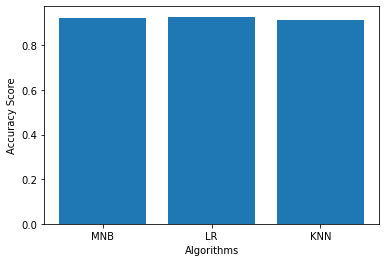

In [51]:
plt.bar(x=['MNB','LR','KNN'],height=[mnb_acc,lr_acc,knn_acc])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
plt.show()

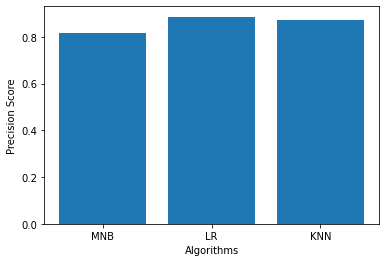

In [52]:
plt.bar(x=['MNB','LR','KNN'],height=[mnb_pr,lr_pr,knn_pr])
plt.xlabel('Algorithms')
plt.ylabel('Precision Score')
plt.show()

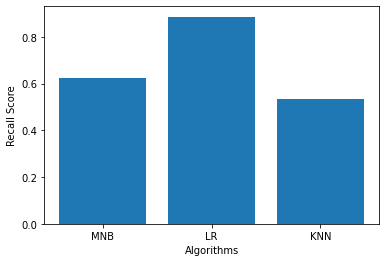

In [53]:
plt.bar(x=['MNB','LR','KNN'],height=[mnb_rec,lr_rec,knn_rec])
plt.xlabel('Algorithms')
plt.ylabel('Recall Score')
plt.show()

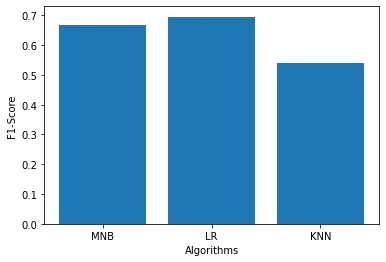

In [54]:
plt.bar(x=['MNB','LR','KNN'],height=[mnb_f1,lr_f1,knn_f1])
plt.xlabel('Algorithms')
plt.ylabel('F1-Score')
plt.show()

Here MNB is Multinomial Naive Bayes Classification, LR is Logical Regression, KNN is K-Nearest Neigbour Classification. By observing above graphs we can come into conclude that Logistic Regression gives best performs to predict the values for given data.

# 7) PREDICTING FEEDBACK FOR TEST DATA USING LOGISITIC REGRESSION

In [55]:
predi = lr.predict(x_test)
predi

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

# 8) COMPUTING CONFUSION MATRIX AND CLASSIFICATION REPORT FOR LOGISTIC REGRESSION MODEL

In [56]:
lr_cm = confusion_matrix(y_test,lr_pred)
print(lr_cm)
print(classification_report(y_test,lr_pred))

[[ 21  52]
 [  4 711]]
              precision    recall  f1-score   support

           0       0.84      0.29      0.43        73
           1       0.93      0.99      0.96       715

    accuracy                           0.93       788
   macro avg       0.89      0.64      0.70       788
weighted avg       0.92      0.93      0.91       788



• Precision is the ratio of true positive to sum of true positive and false positive of ML model predicte as Positive value. Here precision score for 0 is 0.84 and for 1 is 0.93.
    
• Recall is the ratio of true positive to sum of true positive and false negative for Actual positve values. Here recall score for 0 is 0.29 and for 1 is 0.99. 
    
• F1-score is harmonic mean of precision and recall. Here f1-score for 0 is 0.43 and for 1 is 0.96.

• Support is the number which says the actual occurrence of given data set. Here supporting values for 0 is 73 and supporting values for 1 is 715.

<AxesSubplot:xlabel='group'>

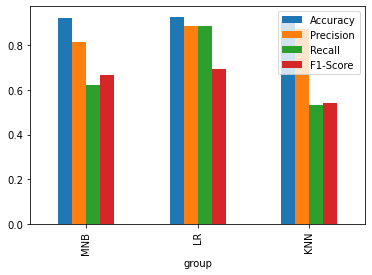

In [57]:
df = pd.DataFrame([['MNB',mnb_acc,mnb_pr,mnb_rec,mnb_f1],
                   ['LR',lr_acc,lr_pr,lr_rec,lr_f1],
                   ['KNN',knn_acc,knn_pr,knn_rec,knn_f1]],
                  columns=['group','Accuracy','Precision','Recall','F1-Score'])
df.plot(x='group',kind='bar',stacked=False)

In [58]:
x2 = ['MULTINOMIAL NAIVE BAYES CLASSIFICATION ','LOGISTIC REGRESSION ','K-NEAREST NEIGHBOURS']
x1 = {'Accuracy':[mnb_acc,lr_acc,knn_acc],
      'Precision (mean)':[mnb_pr,lr_pr,knn_pr],   # MEAN OF ALL COST RANGE
        'Recall (mean)':[mnb_rec,lr_rec,knn_rec],
         'F1-score (mean)':[mnb_f1,lr_f1,knn_f1]}

df=pd.DataFrame(x1,x2)
df

,Accuracy,Precision (mean),Recall (mean),F1-score (mean)
MULTINOMIAL NAIVE BAYES CLASSIFICATION,0.921320,0.816372,0.624543,0.668997
LOGISTIC REGRESSION,0.928934,0.885924,0.885924,0.695341
K-NEAREST NEIGHBOURS,0.912437,0.873188,0.533547,0.540245


# CONCLUSION
On computation it have been concluded that Logistic regression is best model to predict sentiment (either 0 or 1) for given data set.